<a href="https://colab.research.google.com/github/kevintg99/nasa_asteroids_pipeline/blob/main/visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
#Caminho da sua pasta principal no Drive
base_dir = '/content/drive/MyDrive/asteroid_pipeline'

#Caminho do CSV processado (criado no notebook de tratamento)
processed_data_path = os.path.join(base_dir, 'staging', 'processed', 'asteroids_processed.csv')

In [6]:
#Carregar o CSV com os dados transformados
df_asteroids = pd.read_csv(processed_data_path)

#Mostrar as 5 primeiras linhas pra confirmar
df_asteroids.head()

,id,name,close_approach_date,estimated_diameter_min_km,estimated_diameter_max_km,is_potentially_hazardous_asteroid,relative_velocity_km_per_h,miss_distance_km
0,2280491,280491 (2004 MO7),2025-04-30,0.417402,0.933340,False,84564.391842,3.089635e+07
1,3277704,(2005 JR5),2025-04-30,0.101054,0.225964,False,78443.534596,5.607447e+07
2,3550073,(2010 UJ7),2025-04-30,0.022108,0.049436,False,62969.856295,6.661439e+07
3,3719999,(2015 KR120),2025-04-30,0.067695,0.151370,False,59474.494435,4.111472e+07
4,3802425,(2018 GN1),2025-04-30,0.008801,0.019681,False,53676.969219,3.000556e+07


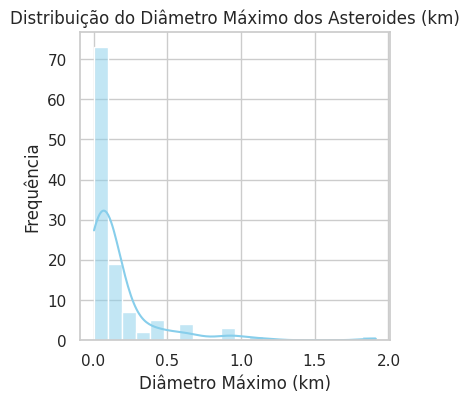

In [10]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (4, 4)

#Histograma dos diâmetros
plt.figure()
sns.histplot(df_asteroids['estimated_diameter_max_km'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição do Diâmetro Máximo dos Asteroides (km)')
plt.xlabel('Diâmetro Máximo (km)')
plt.ylabel('Frequência')
plt.show()

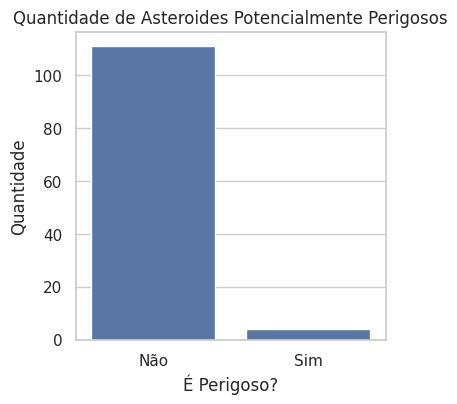

In [12]:
#Gráfico de barras - perigosos vs não perigosos
plt.figure()
sns.countplot(x='is_potentially_hazardous_asteroid', data=df_asteroids)
plt.title('Quantidade de Asteroides Potencialmente Perigosos')
plt.xlabel('É Perigoso?')
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

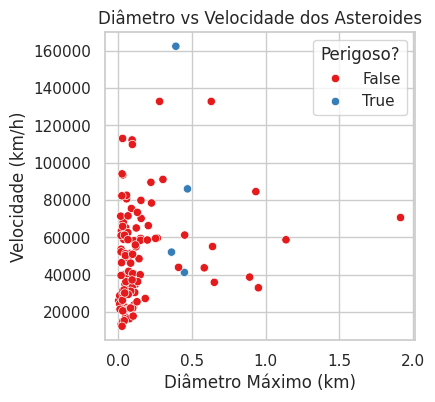

In [13]:
#Dispersão - diâmetro vs velocidade
plt.figure()
sns.scatterplot(
    x='estimated_diameter_max_km',
    y='relative_velocity_km_per_h',
    hue='is_potentially_hazardous_asteroid',
    data=df_asteroids,
    palette='Set1'
)
plt.title('Diâmetro vs Velocidade dos Asteroides')
plt.xlabel('Diâmetro Máximo (km)')
plt.ylabel('Velocidade (km/h)')
plt.legend(title='Perigoso?')
plt.show()


In [14]:
#Top 5 asteroides mais próximos da Terra
top5_close = df_asteroids.sort_values(by='miss_distance_km').head(5)
print("Top 5 asteroides mais próximos da Terra:")
print(top5_close[['name', 'miss_distance_km', 'relative_velocity_km_per_h']])

Top 5 asteroides mais próximos da Terra:
           name  miss_distance_km  relative_velocity_km_per_h
114  (2025 HL5)      6.315614e+05                30216.899233
14   (2025 HM4)      7.667872e+05                68215.152962
98   (2025 HF5)      1.362881e+06                15386.246509
35   (2024 JM2)      2.742305e+06                40622.450509
86   (2025 HN3)      3.033906e+06                50239.317954


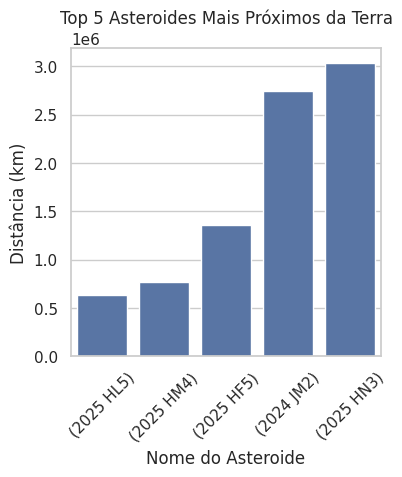

In [16]:
#Gráfico de barras do top 5
plt.figure()
sns.barplot(x='name', y='miss_distance_km', data=top5_close)
plt.title('Top 5 Asteroides Mais Próximos da Terra')
plt.xlabel('Nome do Asteroide')
plt.ylabel('Distância (km)')
plt.xticks(rotation=45)
plt.show()